In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import math

#Import DecisionTree as a classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
from sklearn.metrics import recall_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
from sklearn.metrics import precision_score

#!pip install root-numpy
import ROOT

ImportError: Failed to import libcppyy3_8. Please check that ROOT has been built for Python 3.8

In [3]:
path = ''
file = 'RecoilsData.csv'
#file = 'RecoilsData_AV_moreVar.csv'

df = pd.read_csv(path + file)

#drop events with no recoils at all
df = df[df['ar40recoils'] != 0]

#vars_to_drop = ['neckVetoN', 'subeventN']#,'nhit', 'nhit_5000', 'mblikelihoodE', 'lateNhit']
#vars_to_drop = ['nhit', 'nhit_5000', 'mblikelihoodE', 'lateNhit']
#drop irrelevant variables
#df = df.drop(vars_to_drop, axis=1)

#drop rows with the value -99999, these are outliers
df = df.drop(index=df[df.eq(-99999).any(axis=1)].index)

df.head()
print(df.shape)

(1209, 25)


In [4]:
#drop the variable used to make the flags for multiple recoils
df = df.drop(['ar40recoils'], axis=1) 
print(df.shape)

(1209, 24)


In [5]:
# Count the occurrences of each value in multiplerecoils
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)
# Drop rows with multiplerecoils to make it more even between multiple and single
#df = df.drop(df[df['multiplerecoils'] == 1].head(659).index) #50-50
#df = df.drop(df[df['multiplerecoils'] == 1].head(300).index) #2-1
# Count the occurrences of each value in multiplerecoils again
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

1    934
0    275
Name: multiplerecoils, dtype: int64
1    934
0    275
Name: multiplerecoils, dtype: int64


In [6]:
# Get a random permutation of the DataFrame's index
random_order = np.random.RandomState(seed=9).permutation(df.index)

# Reorder the DataFrame randomly using the random permutation
df = df.loc[random_order]

In [7]:
# Count the occurrences of each value in multiplerecoils again
value_counts = df['multiplerecoils'].value_counts()
print(value_counts)

1    934
0    275
Name: multiplerecoils, dtype: int64


In [8]:
#dependent variable that will be predicted
var = 'multiplerecoils'

X = df.drop([var], axis=1)

# Select the dependent variable
y = df[var] 

print(X.shape)
print(y.shape)

(1209, 23)
(1209,)


In [9]:
# Create the GradientBoostingClassifier (Boosted Decision Tree)
boosted_tree = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

print("Created Boosted Decision Tree Classifier")

Created Boosted Decision Tree Classifier


In [10]:
# Perform cross-validation with 10 folds
# 'cv' parameter specifies the number of folds
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy')
cross_val_scores = cross_val_score(boosted_tree, X, y, cv=10, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-Validation Scores:")
for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_score = cross_val_scores.mean()
print(f"\nAverage Score: {average_score:.2f}")

Cross-Validation Scores:
Fold 1: 0.80
Fold 2: 0.76
Fold 3: 0.76
Fold 4: 0.82
Fold 5: 0.79
Fold 6: 0.81
Fold 7: 0.76
Fold 8: 0.82
Fold 9: 0.82
Fold 10: 0.74

Average Score: 0.79


In [127]:
#optional
#additional cross validation scores
'''
scores = cross_validate(boosted_tree, X, y, cv=10, scoring='accuracy',return_train_score=True)

# Print the cross-validation scores for each fold
print("Cross-Validate Test Scores:")
for fold, score in enumerate(scores['test_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['test_score'].mean()
print(f"\nAverage Test Score: {average_scoreval:.2f}")

# Print the cross-validation train scores for each fold
print("\nCross-Validate Train Scores:")
for fold, score in enumerate(scores['train_score'], start=1):
    print(f"Fold {fold}: {score:.2f}")

# Calculate and print the average cross-validation score
average_scoreval = scores['train_score'].mean()
print(f"\nAverage Train Score: {average_scoreval:.2f}")

# Print the cross-validation fit times for each fold
print("\nFit Times (s):")
for fold, fit_time in enumerate(scores['fit_time'], start=1):
    print(f"Fold {fold}: {fit_time:.2f}")

# Calculate and print the average fit time
average_fittime = scores['fit_time'].mean()
print(f"\nAverage fit time: {average_fittime:.2f}")

# Print the cross-validation score times for each fold
print("\nScore Times (s):")
for fold, score_time in enumerate(scores['score_time'], start=1):
    print(f"Fold {fold}: {score_time:.2f}")

# Calculate and print the average score time
average_scoretime = scores['score_time'].mean()
print(f"\nAverage score time: {average_scoretime:.2f}")
'''

'\nscores = cross_validate(boosted_tree, X, y, cv=10, scoring=\'accuracy\',return_train_score=True)\n\n# Print the cross-validation scores for each fold\nprint("Cross-Validate Test Scores:")\nfor fold, score in enumerate(scores[\'test_score\'], start=1):\n    print(f"Fold {fold}: {score:.2f}")\n\n# Calculate and print the average cross-validation score\naverage_scoreval = scores[\'test_score\'].mean()\nprint(f"\nAverage Test Score: {average_scoreval:.2f}")\n\n# Print the cross-validation train scores for each fold\nprint("\nCross-Validate Train Scores:")\nfor fold, score in enumerate(scores[\'train_score\'], start=1):\n    print(f"Fold {fold}: {score:.2f}")\n\n# Calculate and print the average cross-validation score\naverage_scoreval = scores[\'train_score\'].mean()\nprint(f"\nAverage Train Score: {average_scoreval:.2f}")\n\n# Print the cross-validation fit times for each fold\nprint("\nFit Times (s):")\nfor fold, fit_time in enumerate(scores[\'fit_time\'], start=1):\n    print(f"Fold 

In [128]:
# Splitting the dataset to Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1190, 21)
(1190,)
(298, 21)
(298,)


In [129]:
#Train DT
boosted_tree.fit(X_train, y_train)
print("Training set score: %f" % boosted_tree.score(X_train, y_train))
print("Test set score: %f" % boosted_tree.score(X_test, y_test))

Training set score: 0.916807
Test set score: 0.795302


In [130]:
# Make predictions on the test set
y_pred = boosted_tree.predict(X_test)

In [131]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")

Accuracy: 0.79530


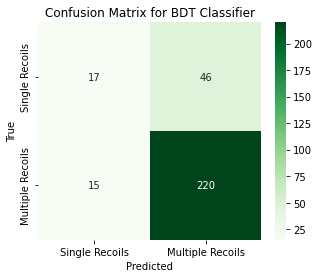

In [132]:

# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Define the class labels
# Create a mapping dictionary to replace 0 with 'single' and 1 with 'multiple'
#label_mapping = {0: 'single recoils', 1: 'multiple recoils'}

# Replace the labels using the mapping dictionary
#df[var] = df[var].replace(label_mapping)

#class_labels = df[var].unique()
#class_labels = ['single recoils', 'multiple recoils'] #negative, positive

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d')

# Add a legend
tick_marks = np.arange(len(df[var].unique())) + 0.5
plt.xticks(tick_marks, ['Single Recoils', 'Multiple Recoils'])
plt.yticks(tick_marks, ['Single Recoils', 'Multiple Recoils'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for BDT Classifier')

# Display the plot
plt.show()

In [133]:
#calculate recall, precision and F1 score

rec = recall_score(y_test, y_pred)#, average='binary')
#The recall is intuitively the ability of the classifier to find all the positive samples.
pres = precision_score(y_test, y_pred)#, average='binary')
#The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
F1_score = 2/((1/rec) + (1/pres))
#F1 is the harmmonic mean between recall and precision

#weighted metrics
wrec = recall_score(y_test, y_pred, average='weighted')
wpres = precision_score(y_test, y_pred, average='weighted')
wF1_score = 2/((1/wrec) + (1/wpres))

print("The recall is: ", rec)
print("The precision is: ", pres)
print("The F1-score is: ", F1_score)

print("\nThe weighted recall is: ", wrec)
print("The weighted precision is: ", wpres)
print("The weighted F1-score is: ", wF1_score)

The recall is:  0.9361702127659575
The precision is:  0.8270676691729323
The F1-score is:  0.8782435129740519

The weighted recall is:  0.7953020134228188
The weighted precision is:  0.7645290344148963
The weighted F1-score is:  0.7796119730187986


In [134]:
#metrics by hand

tn, fp, fn, tp = cm.ravel()

err = (fp + fn)/(fp + fn + tn + tp)
acc = (tp + tn)/(fp + fn + tn + tp)
re = tp/(tp + fn)
sp = tn/(tn + fp)
prec = tp/(tp + fp)
fpr = fp/(tn + fp)
mcc = ((tp*tn) - (fp*fn))/math.sqrt((tp + fp)*(tp + tn)*(tn + fp)*(tn + fn))
F1 = 2/((1/re) + (1/prec))

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)
print("\nError rate:", err)
print("Accuracy:", acc)
print("Recall:", re) #sensitivity, true positive rate
print("Specificity:", sp) #true negative rate
print("Precision:", prec) #positive predictive value
print("False positive rate:", fpr)
print("Mathews correlation coefficient:", mcc)
print("F1 score:", F1)

True Negative: 17
False Positive: 46
False Negative: 15
True Positive: 220

Error rate: 0.20469798657718122
Accuracy: 0.7953020134228188
Recall: 0.9361702127659575
Specificity: 0.2698412698412698
Precision: 0.8270676691729323
False positive rate: 0.7301587301587301
Mathews correlation coefficient: 0.2705450449061114
F1 score: 0.8782435129740519


In [135]:
# Get the feature importances
importance = boosted_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

# Sum all the importance values
total_importance = feature_importances_df.sum()
print("")
print(f"Total Importance: {total_importance['Importance']}")

                   Feature  Importance
12          rprompt60Bayes    0.188403
1                  fprompt    0.175993
4                   fmaxpe    0.135550
16           mblikelihoodR    0.051615
15           mblikelihoodZ    0.050386
8   chargesecondbottomring    0.046229
11                nSCBayes    0.045484
18               timefit2Y    0.041596
5            chargetopring    0.037453
14           mblikelihoodY    0.032838
9    chargethirdbottomring    0.027037
6         chargesecondring    0.023137
2                eventTime    0.023039
10      pulseindexfirstgar    0.022335
20                  deltat    0.021550
0                      qPE    0.020666
19               timefit2Z    0.020185
13           mblikelihoodX    0.014477
7         chargebottomring    0.010499
17               timefit2X    0.009360
3           numEarlyPulses    0.002167

Total Importance: 0.9999999999999996


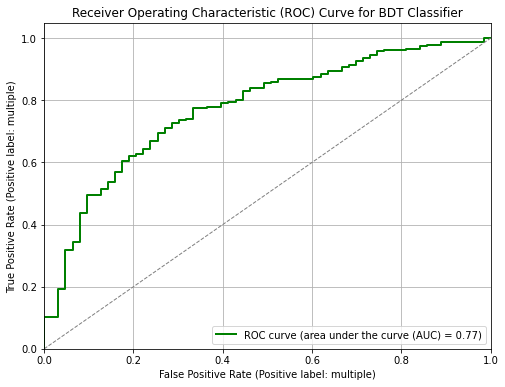

In [136]:
# Get predicted probabilities for the positive class (1) on the test set
y_prob = boosted_tree.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='g', lw=2, label='ROC curve (area under the curve (AUC) = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Positive label: multiple)')
plt.ylabel('True Positive Rate (Positive label: multiple)')
plt.title('Receiver Operating Characteristic (ROC) Curve for BDT Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [40]:
#pip install root-numpy #issue with root version ImportError: dynamic module does not define module export function (PyInit_libPyROOT)
#save predicted multiple recoils to a .root file

# Convert y_pred to a DataFrame with a column name
y2_pred = pd.DataFrame(data = y_pred, index=X_test.index, columns = [var])

prediction = pd.concat([X_test, y2_pred], axis=1)

#keep only multiple recoils and drop that column
prediction = prediction[prediction[var] == 1]
prediction = prediction.drop([var], axis=1)

#reset the indexes of prediction
prediction.reset_index(drop=True, inplace=True)

print(prediction.head())
#save to csv
#prediction.to_csv('prediction.csv', index=False)

          qPE   fprompt  eventTime  numEarlyPulses    fmaxpe  chargetopring  \
0     60.9802  0.559862    2467.23               0  0.045019         1.8328   
1  16519.6000  0.277253    2502.45               0  0.048636       166.0620   
2  11684.6000  0.307023    2505.10               1  0.024145       123.7850   
3  30444.1000  0.272028    2532.87               1  0.044508       370.8210   
4  18898.1000  0.277293    2521.83               0  0.037808       227.8460   

   chargesecondring  chargebottomring  chargesecondbottomring  \
0          0.913071             0.000                0.878396   
1        209.693000           262.459              275.934000   
2        122.137000           276.884              307.636000   
3        358.412000           464.779              422.160000   
4        226.994000           252.538              249.938000   

   chargethirdbottomring  ...  mblikelihoodX  mblikelihoodY  mblikelihoodZ  \
0                 1.0473  ...      -599.4120        221.

In [41]:
# Path to the .root file
root_file_path = 'roi_802_days_11March2020_nsc_rp60_all_tops.root'
root_file_path2 = 'new_blinding_boxes.root'
root_file_path3 = 'save_roi_PLR.root'

# Name of the TCutG you want to use
strip1_name = 'strip1_gr'
strip2_name = 'strip2_gr'
strip3_name = 'roi_gr'
roi_name = 'roi_top30_cut'
roi_plr_name = 'roi_plr_gr'

root_file = ROOT.TFile.Open(root_file_path)
root_file2 = ROOT.TFile.Open(root_file_path2)
root_file3 = ROOT.TFile.Open(root_file_path3)

roi = root_file.Get(roi_name)
strip1 = root_file2.Get(strip1_name)
strip2 = root_file2.Get(strip2_name)
strip3 = root_file2.Get(strip3_name)
roi_plr = root_file3.Get(roi_plr_name)

# Step 2: Define a function to evaluate the TCutG for each event in the DataFrame
def apply_tcutg(df, cutg, cut_name):
    # Create a new column to store the result of the TCutG evaluation
    column_name = 'passes_cut' + cut_name
    df[column_name] = False

    # Evaluate the TCutG for each event in the DataFrame
    for i in range(df.shape[0]):
        if cutg.IsInside(df['qPE'][i], df['fprompt'][i]):
            df.loc[i, column_name] = True

apply_tcutg(prediction, strip1, '_strip1')
apply_tcutg(prediction, strip2, '_strip2')
apply_tcutg(prediction, strip3, '_strip3')
apply_tcutg(prediction, roi, '_roi')
apply_tcutg(prediction, roi_plr, '_roi_plr')

passed_s1 = prediction['passes_cut_strip1'].value_counts()[1]
passed_s2 = prediction['passes_cut_strip2'].value_counts()[1]
passed_s3 = prediction['passes_cut_strip3'].value_counts()[1]
passed_roi = prediction['passes_cut_roi'].value_counts()[1]
passed_roi_plr = prediction['passes_cut_roi_plr'].value_counts()[1]

print('There are', passed_s1, 'events in strip1.')
print('There are', passed_s2, 'events in strip2.')
print('There are', passed_s3, 'events in strip3.')
print('There are', passed_roi, 'events in the R.o.I.')
print('There are', passed_roi_plr, 'events in the PLR R.o.I.')
# Step 3: Print the DataFrame after applying the cut
#print(prediction)

# Close the ROOT file
root_file.Close()
root_file2.Close()
root_file3.Close()

There are 44 events in strip1.
There are 35 events in strip2.
There are 11 events in strip3.
There are 7 events in the R.o.I.
There are 7 events in the PLR R.o.I.


Warning in <TFile::Init>: file new_blinding_boxes.root probably not closed, trying to recover
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:roi_gr at address 242
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip2_gr at address 3281
Info in <TFile::Recover>: new_blinding_boxes.root, recovered key TGraph:strip1_gr at address 4352
Warning in <TFile::Init>: successfully recovered 3 keys
Warning in <TFile::Init>: no StreamerInfo found in new_blinding_boxes.root therefore preventing schema evolution when reading this file. The file was produced with version 5.34/36 of ROOT.
